<h1>Задание</h1>
<b>Построение модели потребления</b>
<ul>
<li>Нужно сгенерировать синтетический набор товаров (не менее 20), которые содержат закупочную цену и цену.</li>
<li>Нужно построить несколько (не менее 5) моделей поведения потребителей (МПП), которые принимают решения о покупке товаров (и количества единиц) из набора синтетических правил ("решающих деревьев") на основе цен. Модели должны быть стохастическими и выдавать полный вектор спроса. Также хотя бы в некоторых моделях должно быть решение на основе сравнения цены одного товара с другим.</li>
<li>Построить модель ("большая модель"), на вход которой поступают МПП и их доли в общем количестве, и параметры N - общее число покупателей</li>
<li>Постройте функцию, которая любым алгоритмом ("аналитически", методом случайного поиска и т.д.) точный оптимум большой модели при фиксированном распределении долей МПП.</li>
<li><b>Важно:</b> Протестируйте оптимум при разном распределении долей МПП. Оптимум должен изменяться. Если этого не происходит - нужно переделать МПП, так чтобы это происходило.</li>
<li>Зафиксируйте N и доли покупателей.</li>  
<li>Сгенерируйте несколько 3-5 точек для старта алгоритма, которые далее всегда будут использоваться.</li>
</ul>
<b>Задание 1:</b>
<ol>
<li>Постройте "наивный" алгоритм (см. ДЗ№1), который будет находить оптимум по каждому товару, считая, что все товары независимые. Найдите оптимум за 10, 20, 30, 40 итераций. (В каждую итерацию можно изменять всем цены)</li>
<li>Постройте алгоритм основанный "бандитах". Для 10, 20, 30, 40 итераций.</li>
<li>Сравните "наивный" алгоритм и "бандитский" по скорости, точности нахождения оптимума, а также по траектории (суммарная прибыль).</li>
</ol>
<b>Задание 2:</b> Сделайте все тоже самое как в задании 1, только на каждой итерации случайным образом меняйте +-5% меняйте доли покупателей.
<b>Задание 3:</b> Сделайте все тоже самое как в задании 1, только на каждой итерации случайным образом меняйте +-5% меняйте доли покупателей. А также меняйте N +-10% на каждой итерации.

# ДЗ 3. Милютина Лилия Александровна.

## Вспомогательные функции и структуры данных

<b>Построение модели потребления</b>
<ul>
<li>Нужно сгенерировать синтетический набор товаров (не менее 20), которые содержат закупочную цену и цену.</li>
<li>Нужно построить несколько (не менее 5) моделей поведения потребителей (МПП), которые принимают решения о покупке товаров (и количества единиц) из набора синтетических правил ("решающих деревьев") на основе цен. Модели должны быть стохастическими и выдавать полный вектор спроса. Также хотя бы в некоторых моделях должно быть решение на основе сравнения цены одного товара с другим.</li>
<li>Построить модель ("большая модель"), на вход которой поступают МПП и их доли в общем количестве, и параметры N - общее число покупателей</li>
<li>Постройте функцию, которая любым алгоритмом ("аналитически", методом случайного поиска и т.д.) точный оптимум большой модели при фиксированном распределении долей МПП.</li>
<li><b>Важно:</b> Протестируйте оптимум при разном распределении долей МПП. Оптимум должен изменяться. Если этого не происходит - нужно переделать МПП, так чтобы это происходило.</li>
<li>Зафиксируйте N и доли покупателей.</li>  
<li>Сгенерируйте несколько 3-5 точек для старта алгоритма, которые далее всегда будут использоваться.</li>
</ul>

In [1]:
import numpy as np 
from collections import defaultdict
import itertools


import matplotlib.pyplot as plt


from tqdm import tqdm

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# список из пар (закупочная цена, цена)

X = []

for i in range(30):
    el_0 = np.random.uniform(100, 200)
    el_1 = el_0 * (1 + np.random.uniform(0.1, 0.5))
    X.append((el_0, el_1))

In [31]:
# логика бота основана на сравнении закупочной и основной цены с равномерным шумом

def bot1(item, prev_items=[]):
    
    return_Q = 0
        
    if item[1] - item[0] <= 10:
        return_Q = 100 + int(np.random.uniform(10, 20))
    elif item[1] - item[0] <= 15:
        return_Q = 50 + int(np.random.uniform(5, 8))
    elif item[1] - item[0] <= 20:
        return_Q = int(np.random.uniform(2, 3))
        
    if return_Q != 0:
        
        if np.random.uniform(10, 20) > 15:
            return_Q += 5

        if np.random.uniform(100, 200) > 150:
            return_Q += 5
            
    return return_Q

In [4]:
# логика бота основана на сравнении цены товара со средней предыдущих 3-х товаров

def bot2(item, prev_items_all=[]):
    
    return_Q = 0
    
    prev_items = prev_items_all[:3]
        
    if len(prev_items) > 0:
        mean_price = sum(el[0] for el in prev_items) / len(prev_items)
    else:
        mean_price = item[1]
    
    if abs(item[1] - mean_price) <= 50:
        return_Q = 100 + int(np.random.uniform(10, 20))
    elif abs(item[1] - mean_price) <= 100:
        return_Q = 80 + int(np.random.uniform(10, 20))
    elif abs(item[1] - mean_price) <= 150:
        return_Q = 50 + int(np.random.uniform(10, 20))
    else:
        return_Q = 30 + int(np.random.uniform(10, 20))
        
    if np.random.uniform(10, 20) > 15:
        return_Q += 5
        
    if np.random.uniform(100, 200) > 150:
        return_Q += 5
            
    return return_Q

In [5]:
# логика бота основана на сравнении цены товара со средней предыдущих всех товаров

def bot3(item, prev_items=[]):
    
    return_Q = 0
        
    if len(prev_items) > 0:
        mean_price = sum(el[0] for el in prev_items) / len(prev_items)
    else:
        mean_price = item[1]

    if abs(item[1] - mean_price) <= 50:
        return_Q = 100 + int(np.random.uniform(10, 20))
    elif abs(item[1] - mean_price) <= 100:
        return_Q = 80 + int(np.random.uniform(10, 20))
    elif abs(item[1] - mean_price) <= 150:
        return_Q = 50 + int(np.random.uniform(10, 20))
    else:
        return_Q = 30 + int(np.random.uniform(10, 20))

    if np.random.uniform(10, 20) > 15:
        return_Q += 5

    if np.random.uniform(100, 200) > 150:
        return_Q += 5
            
    return return_Q

In [6]:
# логика бота основана на сравнении закупочной и основной цены с нормальным шумом

def bot4(item, prev_items=[]):
    
    return_Q = 0
    
        
    if item[1] - item[0] <= 50:
        return_Q = 100 + int(np.random.normal(10, 1))
    elif item[1] - item[0] <= 100:
        return_Q = 80 + int(np.random.normal(10, 1))
    elif item[1] - item[0] <= 150:
        return_Q = 50 + int(np.random.normal(10, 1))
    else:
        return_Q = 30 + int(np.random.normal(10, 1))
        
    if np.random.normal(10, 5) > 13:
        return_Q += 5
        
    if np.random.normal(100, 5) > 103:
        return_Q += 5
            
    return return_Q

In [7]:
# логика бота основана на сравнении закупочной и основной цены с нормальным шумом

def bot5(item, prev_items=[]):
    
    return_Q = 0
        
    if len(prev_items) > 0:
        mean_price = sum(el[0] for el in prev_items) / len(prev_items)
    else:
        mean_price = item[1]
    
    if abs(item[1] - mean_price) <= 50:
        return_Q = 100 + int(np.random.normal(10, 1))
    elif abs(item[1] - mean_price) <= 100:
        return_Q = 80 + int(np.random.normal(10, 1))
    elif abs(item[1] - mean_price) <= 150:
        return_Q = 50 + int(np.random.normal(10, 1))
    else:
        return_Q = 30 + int(np.random.normal(10, 1))
        
    if np.random.normal(10, 5) > 13:
        return_Q += 5
        
    if np.random.normal(100, 5) > 103:
        return_Q += 5
            
    return return_Q

In [137]:
def big_func_Q(item, prev_items=[], list_of_bots=[bot1, bot2, bot3, bot4, bot5], list_of_bots_num=[0.5, 0.1, 0.2, 0.05, 0.05], N=10):
    
    return_Q = 0
    
    for i, bot in enumerate(list_of_bots):
        for n in range(int(N*list_of_bots_num[i])):
            return_Q_temp = bot(item)
            return_Q += return_Q_temp
    return return_Q

In [138]:
def R(p, c=100):
    return - big_func_Q(p) * (p[1]-c)

In [241]:
y = []
x = []

for i in range(100):
    
    el_0 = np.random.uniform(100, 200)
    el_1 = el_0 * (1 + np.random.normal(0.1, 0.01))
        
    y.append(R((el_0, el_1)))
    x.append(el_1)

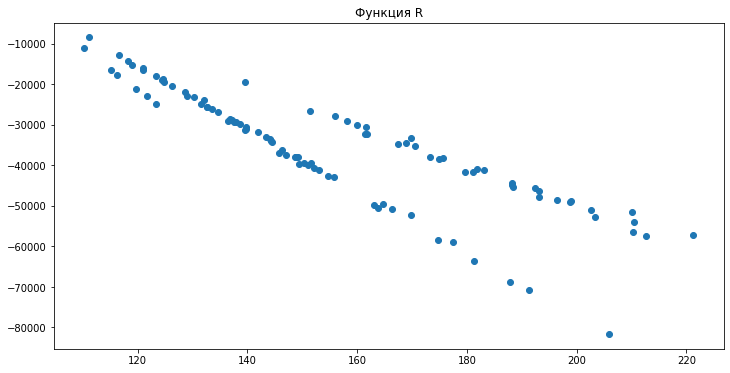

In [214]:
plt.figure(figsize=(12,6))
plt.title('Функция R')
plt.scatter(x, y)
plt.show()

## Задание №1

<li>Постройте "наивный" алгоритм (см. ДЗ№1), который будет находить оптимум по каждому товару, считая, что все товары независимые. Найдите оптимум за 10, 20, 30, 40 итераций. (В каждую итерацию можно изменять всем цены)</li>

In [215]:
def get_polynom(x, y, n):
    return np.polyfit(x, y, n)

In [216]:
def search_optimal_for_n_steps(n=40, number_of_items=30, x_start=100, max_x=300, min_x=100, acc=0.1):
    
    count_of_iters = np.inf
    poly_best = []
    x_inter_best = []
    y_inter_best = []
    x_best = 0
    min_value = 0
    
    y_start = 0
    y_end = 0
    
    k = 0
    
    min_value = np.inf
    x_res = min_x
    
    for k in range(100):
        
        k += 1
        
        for x in np.linspace(x_start, max_x, n):

            el_1 = x * (1 + np.random.normal(0.1, 0.05))

            y = R((x, el_1))

            x_batch = [x]
            y_item = [y]

            coeffs = get_polynom([x_start, max_x] + list(x_batch), [y_start, y_end] + y_item, 2)

            poly = np.poly1d(coeffs)
            x_inter = [x_start, max_x] + list(x_batch)
            y_inter = [poly(x_0) for x_0 in x_inter]

            count_of_iters = k
            x_inter_best = x_inter
            y_inter_best = y_inter
            poly_best = poly
            x_best = x_inter_best[np.argmin(y_inter_best)]

            if np.min(y_inter_best) < min_value and abs(np.min(y_inter_best) - min_value) > 10:
                min_value = np.min(y_inter_best)
                x_res = round(x_best, 2)
        
    return x_res, min_value, x_inter_best, y_inter_best, poly_best, x_best, count_of_iters

In [217]:
# наивный алгоритм 

number_of_items = 20
result_all = defaultdict(list)
    
for n in [10, 20, 30, 40]:

    x_res, min_value, x_inter, y_inter, poly, x_best, count_of_iters = search_optimal_for_n_steps(n=n)
    result_all[i].append(x_res)

In [221]:
def plots(x_res, min_value, x_inter, y_inter, poly, x_best, count_of_iters, x, y):

    fig = plt.figure(figsize=(12,6))

    plt.xlim([100, 250])
    plt.scatter(x, y, label='init function', color='b')

    plt.xlim([100, 250])
    plt.title(f'Минимальное значение функции:')
    plt.scatter(x_res, min_value, color='r', s=100)
    plt.show()

## Посмотрим на график для одного товара:

In [237]:
print(f'Количество итераций: {count_of_iters}')

Количество итераций: 28


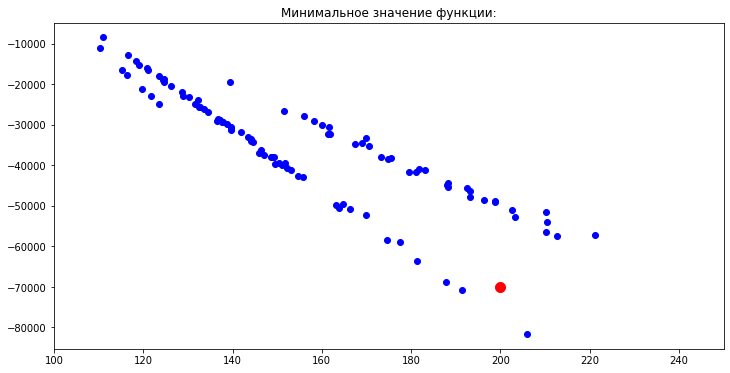

In [223]:
plots(x_res, min_value, x_inter, y_inter, poly, x_best, count_of_iters, x, y)

Кажется, что в целом минимум определяется неплохо.

<li>Постройте алгоритм основанный "бандитах". Для 10, 20, 30, 40 итераций.</li>

In [81]:
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.linear_model import LinearRegression

In [74]:
def alpha_quality(x, y, a, b, p):
    y1 = []
    for x0 in x:
        el_1 = x0 * (1 + np.random.normal(0.1, 0.05))
        y0 = R((x0, el_1))
        y1.append(y0)
        
    rmse_1 = 1 / (mean_squared_error(y, y1) + 0.1)
    return rmse_1 + min(np.abs(np.array(x) - p))

In [102]:
def R1(a,b,p):
    return (a*p+b)*(p-50)

def R2(a,b,p):
    return a*np.exp(-p*b)*(p-50)

In [103]:
def argmax_R1(a,b):
    return -(b-50*a)/(2*a)

def argmax_R2(a,b):
    return 1/b+50

In [116]:
def get_optimal_params_R1(x,y):
    y1 = np.array(y)
    x1 = np.array(x)
    y1 = y1 / (x1-50)
    
    y1 = np.array(y1)
    y1[y1 == np.inf] = 0
    
    reg = LinearRegression().fit(x1.reshape(-1, 1), y1)
    return reg.coef_[0], reg.intercept_

In [123]:
def get_optimal_params_R2(x,y):
    y1 = np.array(y)
    x1 = np.array(x)
    y1 = y1 / (x1 - 50)
    y1 = [abs(y0) for y0 in y1]

    y_log = np.log(y1)
    
    y_log = np.array(y_log)
    y_log[y_log == np.inf] = 0
    
    print(y_log)
    
    reg = LinearRegression().fit(x1.reshape(-1, 1), y_log)
    return np.exp(reg.intercept_), -reg.coef_[0]

In [124]:
bins = [50, 100, 150, 200, 250, 300]

In [231]:
n=100
x = []
y = []
for i in range(0, n):
    x0 = np.random.choice(bins)
    x.append(x0)
    
    el_1 = x0 * (1 + np.random.normal(0.1, 0.05))
    y0 = R((x0, el_1))
    y.append(y0)
    
N=100
l = 0.9
for i in range(0,N):
    a1, b1 = get_optimal_params_R1(x, y)
    a2, b2 = get_optimal_params_R2(x, y)
    bins_values = []
    nkk = dict(Counter(x))
    for k in bins:
        n_k = nkk.get(k,0.1)
        
        alpha1 = alpha_quality(x, y, a1, b1, k)
        alpha2 = alpha_quality(x, y, a2, b2, k)
        A = alpha1 + alpha2
        
        UCB = (R1(a1,b1,k)*alpha1 + R2(a2,b2,k)*alpha2) / (A*2) + np.sqrt(2*np.log(i+n)/n_k)
        QBC = max(R1(a1, b1, k), R2(a2, b2, k)) - min(R1(a1, b1, k),R2(a2, b2, k)) #амплитуда
        bins_values.append(l*UCB + (1-l)*QBC)
    argmax_k=bins[np.argmax(bins_values)] #np.argmax(bins_values)

    x0=argmax_k
    x.append(x0)

    el_1 = x0 * (1 + np.random.normal(0.1, 0.05))
    y0 = R((x0, el_1))
    y.append(y0)

[6.05867749 6.75076037 5.02408531 6.2347548  5.09912051 6.36532758
 5.84712135 6.07204475 5.81794688 5.8663146  5.97501434 6.74932589
 6.47870842 6.41457404 2.32967704 5.77288556 6.55121389 5.92207811
 6.01404495 5.98779914 5.43036782 5.98168227 4.34771904 6.0514655
 6.06422585 5.86646181 3.56585482 0.         6.03595856 6.01502204
 3.82734604 6.08019858 5.95574145 5.95963604 5.94296117 6.00804928
 6.09405733 6.714964   6.03851768 5.26200225 6.0723796  5.05719946
 0.         6.0633536  6.17567488 6.02789712 6.06921912 6.0755885
 5.88479157 5.27964759 5.78003491 5.98534613 5.91281408 6.08780385
 5.8009966  6.38355062 5.87454691 6.03518157 6.15199733 6.40360613
 5.25183401 6.11473386 5.78330855 5.98373589 6.7262172  0.
 6.05387558 6.01276572 0.         0.         6.112405   4.95949281
 6.05403063 6.05318516 5.96332007 6.18139621 6.00705441 6.0984303
 6.79987195 6.44555012 5.10232791 5.98738231 0.         6.08475874
 5.32653782 6.37920755 0.         6.06486639 6.05652494 6.07907663
 6.071

In [234]:
x

[300,
 300,
 100,
 150,
 100,
 200,
 150,
 250,
 150,
 150,
 200,
 300,
 250,
 250,
 250,
 250,
 250,
 250,
 250]

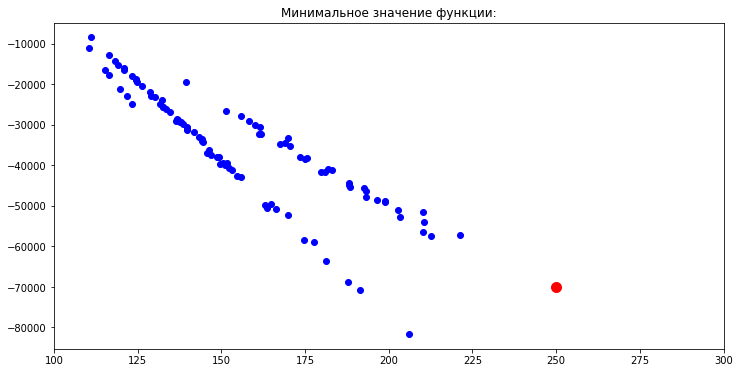

In [227]:
plots(x_res, min_value, x_res, y_inter, poly, x_best, count_of_iters, x, y)

**Выводы:**   
- Алгоритм, основанный на бандитах хуже находит минимум. Кажется, что если сделать поаккуратнее бины - будет лучше  
- Сходимость алгоритма, основанного на бандитах быстрее. Примерно к 10-ой итерации стабилизируется значение 250, тогда как жадному алгоритму понадобилось около 30 итераций. Но опять-таки дело, возможно в бинаризации. Если ее применить в жадном алгоритме, можно было бы добиться быстрее сходимости.

# Задание №2

 Сделайте все тоже самое как в задании 1, только на каждой итерации случайным образом меняйте +-5% меняйте доли покупателей.

In [238]:
def search_optimal_for_n_steps_with_changes(n=40, list_of_bots_num=[0.5, 0.1, 0.2, 0.1, 0], N=10, number_of_items=30, x_start=100, max_x=300, min_x=100, acc=0.1):
    
    count_of_iters = np.inf
    poly_best = []
    x_inter_best = []
    y_inter_best = []
    x_best = 0
    min_value = 0
    
    y_start = 0
    y_end = 0
    
    k = 0
    
    min_value = np.inf
    x_res = min_x
    
    for k in range(100):
        
        k += 1
        
        for x in np.linspace(x_start, max_x, n):

            el_1 = x * (1 + np.random.normal(0.1, 0.05))
            
            list_of_bots_num = [el + 0.05 * el * random.choice([True, False]) for el in list_of_bots_num]

            y = - big_func_Q(x, list_of_bots_num=list_of_bots_num) * (el[1]-c)

            x_batch = [x]
            y_item = [y]

            coeffs = get_polynom([x_start, max_x] + list(x_batch), [y_start, y_end] + y_item, 2)

            poly = np.poly1d(coeffs)
            x_inter = [x_start, max_x] + list(x_batch)
            y_inter = [poly(x_0) for x_0 in x_inter]

            count_of_iters = k
            x_inter_best = x_inter
            y_inter_best = y_inter
            poly_best = poly
            x_best = x_inter_best[np.argmin(y_inter_best)]

            if np.min(y_inter_best) < min_value and abs(np.min(y_inter_best) - min_value) > 10:
                min_value = np.min(y_inter_best)
                x_res = round(x_best, 2)
        
    return x_res, min_value, x_inter_best, y_inter_best, poly_best, x_best, count_of_iters

In [242]:
# наивный алгоритм 

number_of_items = 20
result_all = defaultdict(list)
    
for n in [10, 20, 30, 40]:

    x_res, min_value, x_inter, y_inter, poly, x_best, count_of_iters = search_optimal_for_n_steps(n=n)
    result_all[i].append(x_res)

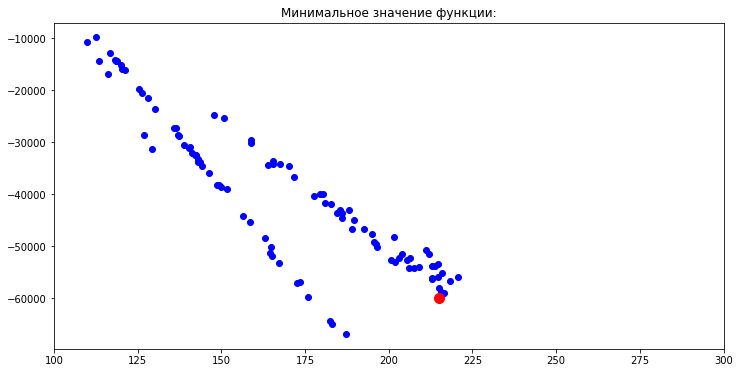

In [249]:
plots(x_res, min_value, x_inter, y_inter, poly, x_best, count_of_iters, x, y)

**Выводы:**  
- При рандомизированном увеличении/уменьшении доли оптимум сместился. Стало немного хуже, так как теперь больше хаотичности в системе.

# Задание №3

Сделайте все тоже самое как в задании 1, только на каждой итерации случайным образом меняйте +-5% меняйте доли покупателей. А также меняйте N +-10% на каждой итерации.

In [250]:
def search_optimal_for_n_steps_with_changes(n=40, list_of_bots_num=[0.5, 0.1, 0.2, 0.1, 0], N=10, number_of_items=30, x_start=100, max_x=300, min_x=100, acc=0.1):
    
    count_of_iters = np.inf
    poly_best = []
    x_inter_best = []
    y_inter_best = []
    x_best = 0
    min_value = 0
    
    y_start = 0
    y_end = 0
    
    k = 0
    
    min_value = np.inf
    x_res = min_x
    
    for k in range(100):
        
        k += 1
        
        for x in np.linspace(x_start, max_x, n):

            el_1 = x * (1 + np.random.normal(0.1, 0.05))
            
            list_of_bots_num = [el + 0.05 * el * random.choice([True, False]) for el in list_of_bots_num]
            N = N + 0.1 * N * random.choice([True, False])

            y = - big_func_Q(x, list_of_bots_num=list_of_bots_num, N=N) * (el[1]-c)

            x_batch = [x]
            y_item = [y]

            coeffs = get_polynom([x_start, max_x] + list(x_batch), [y_start, y_end] + y_item, 2)

            poly = np.poly1d(coeffs)
            x_inter = [x_start, max_x] + list(x_batch)
            y_inter = [poly(x_0) for x_0 in x_inter]

            count_of_iters = k
            x_inter_best = x_inter
            y_inter_best = y_inter
            poly_best = poly
            x_best = x_inter_best[np.argmin(y_inter_best)]

            if np.min(y_inter_best) < min_value and abs(np.min(y_inter_best) - min_value) > 10:
                min_value = np.min(y_inter_best)
                x_res = round(x_best, 2)
        
    return x_res, min_value, x_inter_best, y_inter_best, poly_best, x_best, count_of_iters

In [251]:
# наивный алгоритм 

number_of_items = 20
result_all = defaultdict(list)
    
for n in [10, 20, 30, 40]:

    x_res, min_value, x_inter, y_inter, poly, x_best, count_of_iters = search_optimal_for_n_steps(n=n)
    result_all[i].append(x_res)

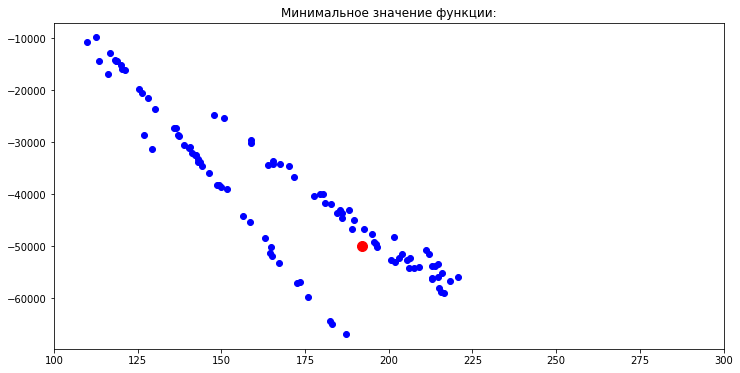

In [253]:
plots(, x_inter, y_inter, poly, x_best, count_of_iters, x, y)

**Выводы:** 
- Аналогично предыдущему пункту при внесении хаотичности и нестабильности в систему оптимум находится хуже

# Общие выводы

- На разных моделях МПП древовидной структуры были применены наивный алгоритм и UCB + QBC  
- При внесении временной зависимости результаты получаются хуже, так как систему хаотично "шатает" и алгоритм хуже находит оптимум